# SMA Analysis

In [ ]:
#default
ticker="MSFT"
start_date="2025-01-01"
end_date="2025-05-20"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import ta

In [ ]:
print(f"Ticker: {ticker}")
print(f"Start date: {start_date}")
print(f"End date: {end_date}")

In [ ]:
# Download historical data
data = yf.download(ticker, start=start_date, end=end_date,multi_level_index=False)
data.reset_index(inplace=True)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
display(data.head())
display(data.tail())

,Close,High,Low,Open,Volume
Date,,,,,
2025-01-02,416.976868,424.438202,413.261173,423.900262,16896500
2025-01-03,421.728607,422.405996,417.933202,419.467282,16662900
2025-01-06,426.211365,432.656586,423.850447,426.360784,20573600
2025-01-07,420.752350,429.000637,419.188356,427.356962,18139100
2025-01-08,422.933990,425.334764,419.925568,421.838197,15054600


,Close,High,Low,Open,Volume
Date,,,,,
2025-05-12,448.436737,448.546521,438.974098,445.122814,22821900
2025-05-13,448.316986,449.844181,444.543884,446.959462,23618800
2025-05-14,452.109985,453.068218,447.318794,447.318794,19902800
2025-05-15,453.130005,456.190002,450.429993,450.769989,21992300
2025-05-16,454.269989,454.359985,448.730011,452.049988,23803400


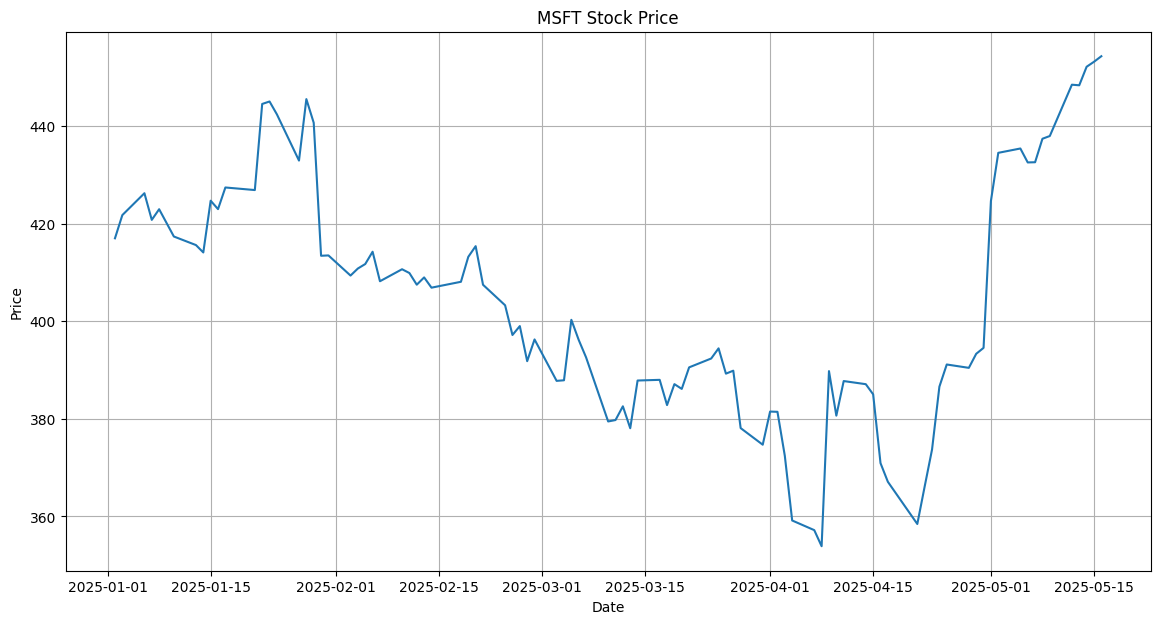

In [4]:
#plot the stock price
plt.figure(figsize=(14, 7))
plt.plot(data['Close'])
plt.title(f'{ticker} Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.show()

## Simple Moving Average (SMA)
- Simple Moving Average (SMA) หรือ ค่าเฉลี่ยเคลื่อนที่อย่างง่าย คือ เครื่องมือทางสถิติและการวิเคราะห์ทางเทคนิคที่ใช้ในการหาค่าเฉลี่ยของข้อมูลในช่วงเวลาที่กำหนด โดยแต่ละจุดข้อมูลในช่วงเวลานั้นจะมีน้ำหนักเท่ากัน SMA มักถูกนำมาใช้เพื่อลดความผันผวนของข้อมูลและระบุแนวโน้มของข้อมูลในช่วงเวลาที่สนใจ

### วิธีการคำนวณ SMA:

ในการคำนวณ SMA จะต้องกำหนดช่วงเวลา (Period) ที่ต้องการหาค่าเฉลี่ยก่อน เช่น SMA 5 วัน หรือ SMA 20 วัน จากนั้นจึงคำนวณค่าเฉลี่ยของข้อมูลในช่วงเวลานั้น

สูตรการคำนวณ SMA คือ:

- SMA = (ผลรวมของข้อมูลในช่วงเวลาที่กำหนด) / (จำนวนข้อมูลในช่วงเวลาที่กำหนด)

ตัวอย่างเช่น หากต้องการคำนวณ SMA 5 วันของราคาปิดหุ้น จะทำได้ดังนี้:

1. รวบรวมราคาปิดหุ้นย้อนหลัง 5 วัน: สมมติว่าราคาปิดหุ้น 5 วันล่าสุดคือ 10, 12, 11, 13, และ 14 บาท
2. คำนวณผลรวมของราคาปิดหุ้น: 10 + 12 + 11 + 13 + 14 = 60
3. หารผลรวมด้วยจำนวนวัน: 60 / 5 = 12
ดังนั้น SMA 5 วันของราคาปิดหุ้นคือ 12 บาท
### การนำ SMA ไปใช้งาน:

- การระบุแนวโน้ม: SMA สามารถช่วยระบุแนวโน้มของราคาได้ หาก SMA มีทิศทางสูงขึ้น แสดงว่าราคาโดยรวมมีแนวโน้มสูงขึ้น และหาก SMA มีทิศทางลดลง แสดงว่าราคาโดยรวมมีแนวโน้มลดลง
- การหาแนวรับแนวต้าน: SMA มักถูกใช้เป็นแนวรับแนวต้านในการซื้อขาย หากราคาลดลงมาใกล้ SMA อาจถือเป็นแนวรับ และหากราคาสูงขึ้นไปใกล้ SMA อาจถือเป็นแนวต้าน
- การเปรียบเทียบกับราคาปัจจุบัน: หากราคาปัจจุบันอยู่เหนือ SMA อาจเป็นสัญญาณว่าราคาอยู่ในช่วงขาขึ้น และหากราคาปัจจุบันอยู่ต่ำกว่า SMA อาจเป็นสัญญาณว่าราคาอยู่ในช่วงขาลง

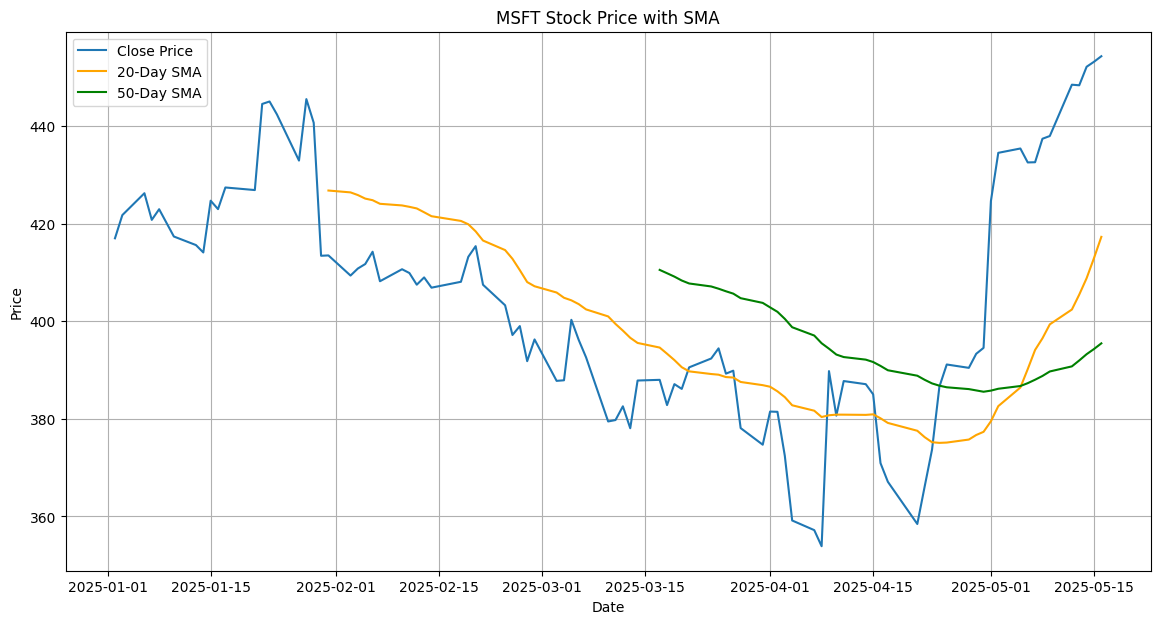

In [5]:
#Simple Moving Average (SMA)
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['SMA_20'], label='20-Day SMA', color='orange')
plt.plot(data['SMA_50'], label='50-Day SMA', color='green')
plt.title(f'{ticker} Stock Price with SMA')
plt.xlabel('Date')
plt.ylabel('Price') 
plt.legend()
plt.grid()
plt.show()


### วิธีการดูกราฟ:

1. ดูแนวโน้ม:
- แนวโน้มขึ้น: หากเส้นราคา (สีฟ้า) และเส้น SMA ทั้งสองเส้นมีทิศทางสูงขึ้น แสดงว่าหุ้นมีแนวโน้มเป็นขาขึ้น
- แนวโน้มลง: หากเส้นราคาและเส้น SMA ทั้งสองเส้นมีทิศทางลดลง แสดงว่าหุ้นมีแนวโน้มเป็นขาลง
- แนวโน้ม Sideways: หากเส้นราคามีการเคลื่อนไหวในกรอบแคบ ๆ และเส้น SMA ไม่ได้มีทิศทางที่ชัดเจน แสดงว่าหุ้นอยู่ในช่วง Sideways หรือไม่มีแนวโน้มที่ชัดเจน
2. ดูการตัดกันของเส้น SMA:
- Golden Cross: เมื่อเส้น 20-Day SMA (สีส้ม) ตัดขึ้นเหนือเส้น 50-Day SMA (สีเขียว) มักเป็นสัญญาณซื้อ ซึ่งบ่งบอกว่าแนวโน้มระยะสั้นเริ่มแข็งแกร่งกว่าแนวโน้มระยะกลาง
- Death Cross: เมื่อเส้น 20-Day SMA ตัดลงต่ำกว่าเส้น 50-Day SMA มักเป็นสัญญาณขาย ซึ่งบ่งบอกว่าแนวโน้มระยะสั้นเริ่มอ่อนแอกว่าแนวโน้มระยะกลาง
3. ดูการเคลื่อนไหวของราคาเทียบกับเส้น SMA:
- แนวรับ: เมื่อราคาลดลงมาใกล้เส้น SMA (โดยเฉพาะเส้น 50-Day SMA) เส้น SMA อาจทำหน้าที่เป็นแนวรับ ซึ่งราคาอาจจะเด้งขึ้นเมื่อมาสัมผัสเส้น SMA
- แนวต้าน: เมื่อราคาสูงขึ้นไปใกล้เส้น SMA เส้น SMA อาจทำหน้าที่เป็นแนวต้าน ซึ่งราคาอาจจะปรับตัวลงเมื่อขึ้นไปสัมผัสเส้น SMA